In [135]:
from src.utils import data_load
import pandas as pd
from src.s3_utils import pandas_from_csv_s3
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from utils import get_survey_question, na_rate

In [136]:

data_survey = data_load(data_keys={'surveys'}, wave=7)['surveys']


In [155]:
survey_question_str = 'fatigue'
data_edema = get_survey_question(data_survey, survey_question_str)
data_all = get_survey_question(data_survey, 'all')

In [156]:
# data_survey_wave5 = data_load(data_keys={'surveys'}, wave=5)['surveys']
# survey_question_str = 'swollen'
# data_edema_wave5 = get_survey_question(data_survey_wave5, survey_question_str)

In [157]:
len(data_edema['user_id'].unique())

588

In [158]:
data_edema.columns

Index(['id', 'user_id', 'survey_id', 'title', 'event_date', 'from', 'to',
       'created_at', 'updated_at', 'question_id', 'question_text',
       'answer_text', 'record_id', 'date'],
      dtype='object')

In [159]:
survey_answer_len = []
for user in data_edema['user_id'].unique():
    survey_answer_len.append(len(data_all[data_all['user_id'] == user]))
    print(user, len(data_all[data_all['user_id'] == user]))

622 147
615 138
604 186
581 239
573 29
603 130
599 174
605 63
595 60
600 13
594 96
574 51
2230 72
2233 106
2234 103
2235 180
2258 21
2259 86
2260 77
2261 104
2645 106
2636 119
2650 108
2656 130
2654 140
2664 87
2637 27
2643 100
2505 22
2502 133
2547 155
2534 13
2536 107
2530 130
2520 26
2503 65
2518 142
2528 106
2548 42
2516 129
2504 99
2540 27
2515 79
2542 22
2543 37
2510 149
2509 44
2563 133
2565 124
2583 132
2574 43
2572 143
2576 62
2551 152
2578 144
2562 95
2571 94
2586 47
2564 86
2582 8
2581 73
2575 107
2584 108
2573 115
2083 245
2094 91
2091 67
2085 69
2084 102
2076 92
2092 3
2093 168
2095 8
2163 77
2183 177
2160 84
2169 167
2194 119
2176 139
2158 58
2178 141
2168 2
2167 112
2166 102
2173 22
2187 66
2171 22
2203 195
2226 178
2197 49
2214 132
2201 38
2212 99
2202 74
2227 15
2210 228
2209 73
2204 143
2196 200
2225 117
2224 57
2223 146
2480 108
2486 35
2483 141
2487 77
2494 109
2500 99
2485 160
2498 144
2496 51
2490 97
2453 68
2489 99
2488 31
2479 13
2484 34
1351 13
2135 28
2126 202

<AxesSubplot:ylabel='Count'>

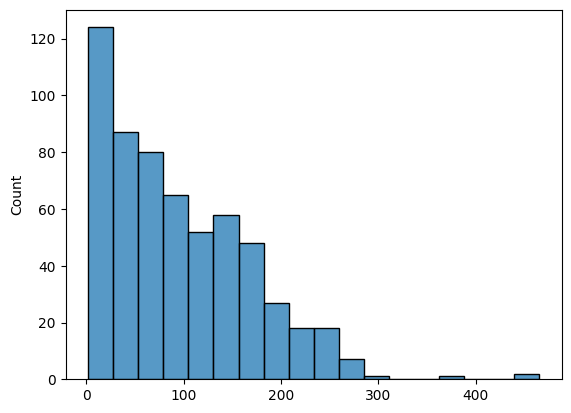

In [160]:
sns.histplot(survey_answer_len)

In [161]:
selected_user = 1400
len(data_edema[data_edema['user_id'] == selected_user][['answer_text', 'date']])


59

In [162]:

def fill_in_all_daily_data(selected_user):
    selected_data_all = data_all[data_all['user_id'] == selected_user][['user_id', 'answer_text', 'date']]
    selected_data_edema = data_edema[data_edema['user_id'] == selected_user][['user_id', 'answer_text', 'date']]
    selected_data_no_symptom = selected_data_all[~selected_data_all['date'].isin(selected_data_edema['date'])]
    selected_data_no_symptom['answer_text'] = 1
    selected_data_edema.answer_text = selected_data_edema.answer_text.astype(int)
    selected_data_combined = pd.concat([selected_data_no_symptom, selected_data_edema])

    selected_data_combined.date = selected_data_combined.date.astype("datetime64")

    date_range = pd.date_range(np.min(selected_data_combined['date']), np.max((selected_data_combined['date'])), freq='d')
    date_df = pd.DataFrame()
    date_df['date'] = date_range
    date_df['user_id'] = selected_user
    date_df['date'] = date_df['date'].astype("datetime64")

    selected_data_combined = pd.merge(date_df, selected_data_combined, how='left')
    selected_data_combined = selected_data_combined.replace("", np.nan)
    selected_data_combined = selected_data_combined.rename(columns={'answer_text': survey_question_str})
    return selected_data_combined


In [163]:
user_data_lst = []
for user in data_edema['user_id'].unique():
    user_data_lst.append(fill_in_all_daily_data(user))

In [164]:
for u in user_data_lst:
    print(len(u))

245
195
292
317
40
280
244
179
284
38
162
51
182
210
180
200
21
197
180
209
147
151
143
139
141
133
149
149
42
161
159
85
144
153
98
91
153
158
153
153
157
158
129
81
157
159
155
155
154
155
150
156
153
159
155
153
155
85
155
96
147
155
155
155
297
175
292
178
264
254
33
216
28
261
244
163
248
227
252
139
264
3
221
212
123
233
132
199
210
179
224
63
224
235
16
230
95
237
246
216
210
218
158
105
162
160
159
158
161
162
161
162
161
164
68
22
158
47
49
287
272
124
309
162
234
251
81
226
162
151
7
240
283
272
45
44
187
210
197
194
202
19
212
193
196
154
141
153
152
152
153
154
151
116
136
154
152
147
65
151
153
154
154
275
168
97
270
248
285
52
273
45
288
158
89
253
302
210
253
184
317
68
272
83
41
163
234
230
273
166
250
201
292
92
166
248
256
254
255
256
176
11
113
229
275
283
89
261
188
202
276
172
305
55
239
186
273
318
158
254
221
194
188
89
194
163
191
196
194
194
6
31
220
273
239
280
108
442
168
74
76
231
115
181
358
452
99
146
277
157
106
548
167
253
43
148
82
100
170
91
148
218
27

In [165]:
sns.pointplot(data=user_data_lst[1], x="date", y="answer_text", markers='.')


ValueError: Could not interpret input 'answer_text'

In [166]:
fig, ax = plt.subplots(figsize=(10, 5))

plot = sns.pointplot(data=user_data_lst[0], x="date", y="answer_text", markers='.')

ax.set_xticklabels([])

plt.show()

ValueError: Could not interpret input 'answer_text'

In [167]:
df = user_data_lst[0].copy()
df['edema_coarse_label'] = df.answer_text
df.loc[df["edema_coarse_label"] >= 2, "edema_coarse_label"] = 2
df.loc[df["edema_coarse_label"] == 1, "edema_coarse_label"] = 0
df

AttributeError: 'DataFrame' object has no attribute 'answer_text'

In [168]:
edema_days = df[df['edema_coarse_label'] == 2]['date']
pre_symptom_range = 3
for i in range(pre_symptom_range):
    df.loc[(df['date'].isin(edema_days-timedelta(days=i))) & (df['edema_coarse_label'] == 0), "edema_coarse_label"] = 1

KeyError: 'edema_coarse_label'

In [169]:
df

,date,user_id,fatigue
0,2021-09-10,622,5.0
1,2021-09-11,622,5.0
2,2021-09-12,622,3.0
3,2021-09-13,622,NaN
4,2021-09-14,622,2.0
...,...,...,...
240,2022-05-08,622,NaN
241,2022-05-09,622,NaN
242,2022-05-10,622,NaN
243,2022-05-11,622,NaN


In [170]:
plot = sns.pointplot(data=df, x="date", y="answer_text", markers='.')

ValueError: Could not interpret input 'answer_text'

In [171]:
plot = sns.pointplot(data=df, x="date", y="edema_coarse_label", markers='.')

ValueError: Could not interpret input 'edema_coarse_label'

In [172]:
def create_coarse_label(df, pre_symptom_range=3):
    df['edema_coarse_label'] = df.answer_text
    df.loc[df["edema_coarse_label"] >= 2, "edema_coarse_label"] = 2
    df.loc[df["edema_coarse_label"] == 1, "edema_coarse_label"] = 0
    edema_days = df[df['edema_coarse_label'] == 2]['date']

    for i in range(1, pre_symptom_range + 1):
        df.loc[(df['date'].isin(edema_days-timedelta(days=i))) & (df['edema_coarse_label'] == 0), "edema_coarse_label"] = 1
    return df

coarse_label_lst = []

# for df in user_data_lst:
#     coarse_label_lst.append(create_coarse_label(df))

for df in user_data_lst:
    user_id = df['user_id'].unique()[0]
    df.to_csv(f"/mnt/dataset/{survey_question_str}/user_{user_id}_{survey_question_str}_label.csv", index=False)